# <span style="color:blue"><u><center>  Introduction to OpenCV</center></u></span>
### <center>- created by Darshita Jain (MTech Computer Science, IIT Gandhinagar)</center>

***
## <u>Table of Contents</u>

### (0) Installing OpenCV
### (1) Basics of OpenCV
    1. Reading an image
    2. Displaying an image
    3. Conversion from BGR to RGB color space
    4. Conversion of RGB to grayscale
    5. Shape of an image
    6. Saving an image
### (2) Image Manipulations
    1. Translation
    2. Rotation
    3. Scaling
    4. Image Smoothing
    5. Edge Detection
    6. Image Thresholding
###  (3) Extracting features from an Image
    1. ORB feature Detector
###  (4) Applications of Computer Vision using OpenCV
    1. Panorama Stitching
    2. Face and Eye Detector using Haar Cascade Classifier
### (5) References
***

## <u>(0) Installing OpenCV</u>
### pip install opencv-contrib-python==3.x.x


In [157]:
# importing the required header files
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [158]:
from google.colab.patches import cv2_imshow

In [159]:
!git clone https://github.com/encoras/Introduction-to-OpenCV.git
%cd Introduction-to-OpenCV
!ls -la

Cloning into 'Introduction-to-OpenCV'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 15.36 MiB | 21.49 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/Introduction-to-OpenCV/Introduction-to-OpenCV/Introduction-to-OpenCV/Introduction-to-OpenCV/Introduction-to-OpenCV/Introduction-to-OpenCV/Introduction-to-OpenCV/Introduction-to-OpenCV
total 16640
drwxr-xr-x 3 root root    4096 Feb  9 10:35  .
drwxr-xr-x 4 root root    4096 Feb  9 10:35  ..
-rw-r--r-- 1 root root    3652 Feb  9 10:35  face.jpg
-rw-r--r-- 1 root root   21450 Feb  9 10:35  flower.jpg
drwxr-xr-x 8 root root    4096 Feb  9 10:35  .git
-rw-r--r-- 1 root root  353714 Feb  9 10:35  haarcascade_eye.xml
-rw-r--r-- 1 root root  963588 Feb  9 10:35  haarcascade_frontalface_default.xml
-rw-r--r-- 1 root root 3991287 Feb  9 10:35  img

## <u>(1) Basics of OpenCV</u>

### 1. Reading an Image

In [160]:
img = cv2.imread("flower.jpg")

### 2. Displaying an Image

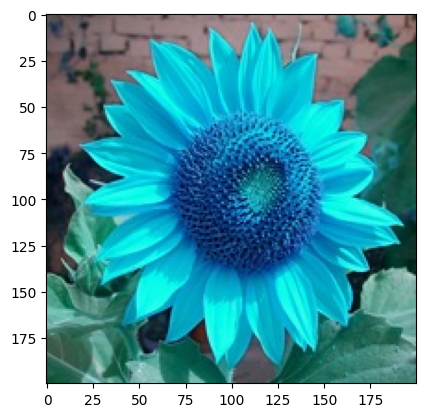

In [161]:
plt.imshow(img)

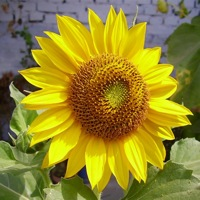

In [162]:
cv2_imshow(img)

### Note: OpenCV uses by default the BGR pixel format. The most common standard for computers to represent colors is RGB. It's simple to convert from BGR to RGB.

### 3. Conversion of BGR color format to RGB

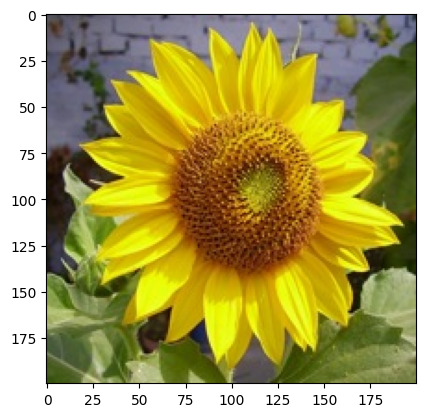

In [163]:
# Convert BGR to RGB color space
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(imgRGB)

### 4. Conversion of RGB to Grayscale

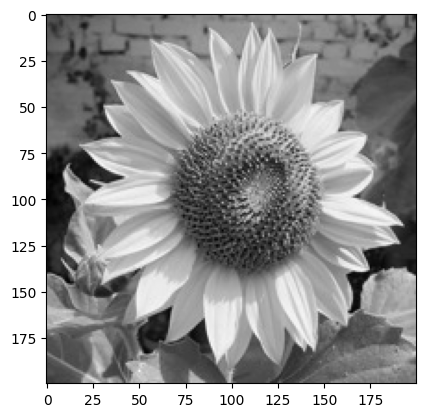

In [164]:
# convert image to grayscale
gray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
# show image
plt.imshow(gray, cmap='gray')

###  5. Shape of an Image

In [165]:
imgRGB.shape

(200, 200, 3)

In the above output (200,200,3) -
the first two values denotes the width and height of the image and 3 denotes the number of color channels(one for each Blue, Green, Red) the image has.

In [166]:
# shape of a grayscale image
gray.shape

(200, 200)

### 6. Saving an Image

In [167]:
saveImg = cv2.imwrite("gray.jpg", gray)

In [168]:
# saving an image in a different format

imgPng = cv2.imwrite("gray.png", gray)

## <u>(2) Image Manipulations</u>

### 1. Translation

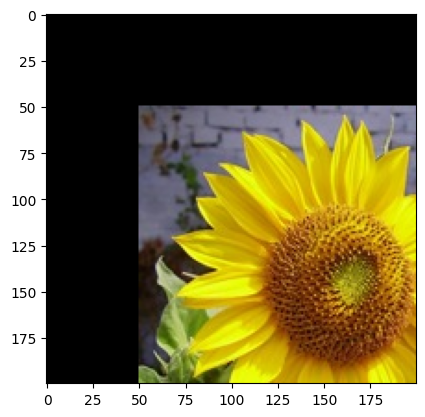

In [169]:
height , width = imgRGB.shape[:2]
Tx , Ty = height/4 , width/4

# Translation matrix is of the form -
#          |1 0 Tx|
#      T = |0 1 Ty|

T = np.float32([[1,0,Tx],[0,1,Ty]])
img_trans =  cv2.warpAffine(imgRGB, T , (width,height))
plt.imshow(img_trans)

### 2. Rotation

### To generate the rotation matrix use -
### cv2.getRotationMatrix2D((rotation_center_x, rotation_center_y) , angle of rotation, scale)

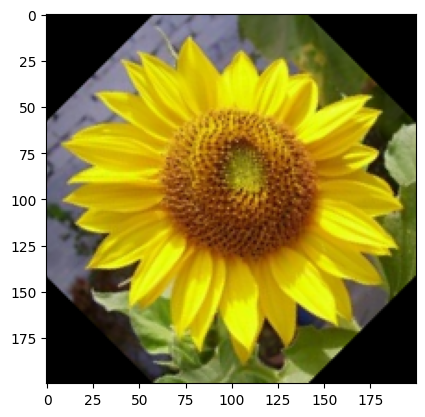

In [170]:
height , width = imgRGB.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2), 45, 1)
img_rotated =  cv2.warpAffine(imgRGB, rotation_matrix , (width,height))
plt.imshow(img_rotated)

### 3. Scaling
#### cv2.resize(image, output_image_size, x_scale, y_scale, interpolation)

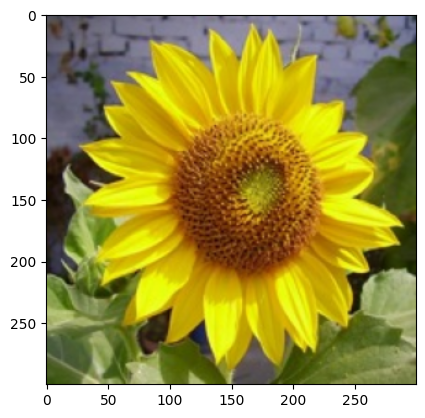

In [171]:
img_scaled = cv2.resize(imgRGB, None, fx = 1.5, fy = 1.5)
plt.imshow(img_scaled)

### 4. Image Smoothing

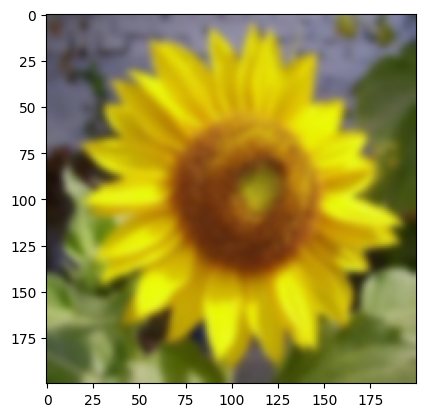

In [172]:
# use cv2.GaussianBlur to smooth the image
blurred = cv2.GaussianBlur(imgRGB, (11,11),0)
plt.imshow(blurred)

### 5. Edge detection

In [173]:
img.shape

(200, 200, 3)

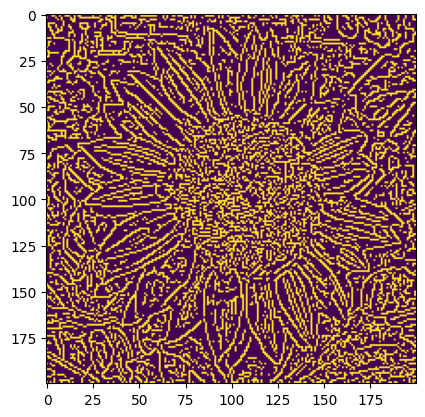

In [174]:
# Edge detection using Canny Edge Detection Algorithm
img_canny = cv2.Canny(img, 10,10)
plt.imshow(img_canny)

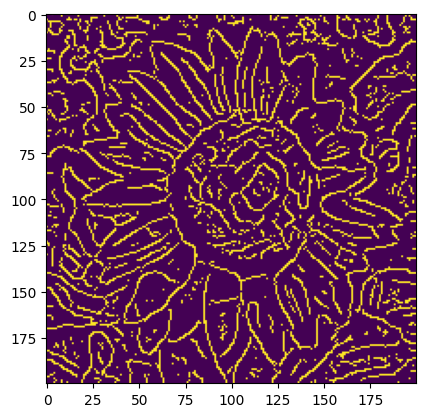

In [175]:
# Edge detection on blurred by using Canny Edge Detection Algorithm
img_canny = cv2.Canny(blurred, 10,10)
plt.imshow(img_canny)

### 6. Image Thresholding

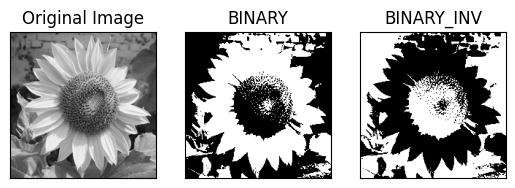

In [181]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('flower.jpg',0) # 0 == gray scaled
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## <u> (3) Extracting features from an Image</u>

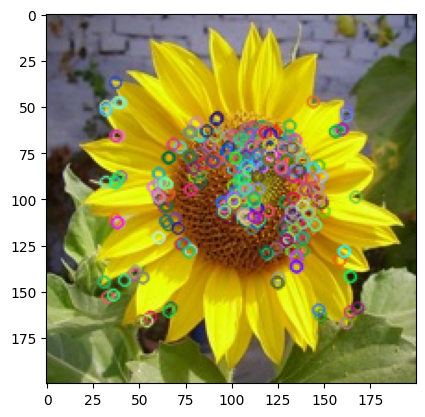

(<matplotlib.image.AxesImage at 0x7f7dda14e270>, None)

In [177]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('flower.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Initiate STAR detector
orb = cv2.ORB_create()

#find the keypoints and compute the descriptors with ORB
kp, des = orb.detectAndCompute(img,None)

# draw keypoints location
img2 = cv2.drawKeypoints(img, kp,None)
plt.imshow(img2),plt.show()

## <u> (4) Applications of Computer Vision using OpenCV</u>


### 1) Panorama Stitching

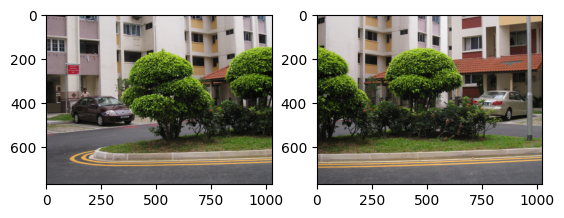

In [178]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the two input image, convert it into RGB scale and resize for further operations
dim=(1024,768)
left=cv2.imread('img1.JPG',cv2.IMREAD_COLOR)
left=cv2.resize(left,dim,interpolation = cv2.INTER_AREA)   #ReSize to (1024,768)
left1 = cv2.cvtColor(left,cv2.COLOR_BGR2RGB)

right=cv2.imread('img2.JPG',cv2.IMREAD_COLOR)
right=cv2.resize(right,dim,interpolation = cv2.INTER_AREA) #ReSize to (1024,768)
right1 = cv2.cvtColor(right,cv2.COLOR_BGR2RGB)

# for plotting the two input images side by side
f, axarr = plt.subplots(1,2)
axarr[0].imshow(left1)
axarr[1].imshow(right1)


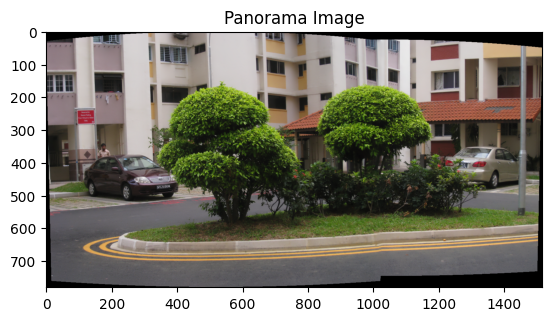

In [179]:
# create a list which will contain the two input images
images=[]
images.append(left)
images.append(right)

#stitcher = cv2.createStitcher()
stitcher = cv2.Stitcher.create()

# ret contains True if pano contains a valid output else False
ret,pano = stitcher.stitch(images)

if ret==cv2.STITCHER_OK:
    pano = cv2.cvtColor(pano,cv2.COLOR_BGR2RGB)
    plt.title('Panorama Image')
    plt.imshow(pano)

else:
    print("Given images cannot be stitched!")

### 2) Face and Eye Detector using HAAR Cascade Classifier

True

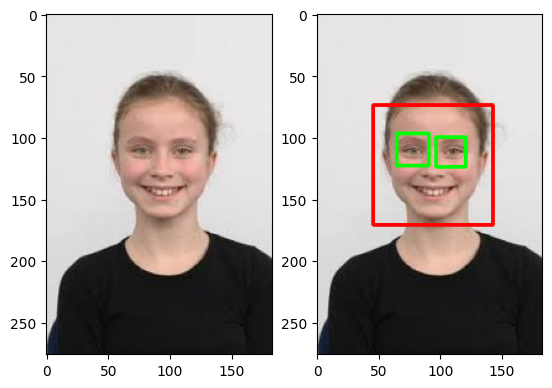

In [180]:
#import required libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

#load the classifiers downloaded from the Github repo

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

#read the image and convert to grayscale format
img = cv.imread('face.jpg')
inputImg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#calculate coordinates of the bounding boxes for face
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # to ensure that the classifier detects eyes within the face and not outside it.
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    #draw bounding boxes around detected features
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# plot the input and output image
f, axarr = plt.subplots(1,2)
axarr[0].imshow(inputImg)
axarr[1].imshow(img)

#write image
cv2.imwrite('face_detection.jpg',img)

## <u>(5) References</u>
        1. https://docs.opencv.org/3.4/index.html
        2. https://www.pyimagesearch.com/
        3. Computer Vision: Algorithms and Applications, Richard Szeliski